In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 
import os
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [37]:
folder = "D:\Tinu Project\Projects Files Excel"
file = "prostate.csv"

data = os.path.join(folder,file)

df = pd.read_csv(data)

In [38]:
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [39]:
df.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


In [41]:
df.isnull().sum()

lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
dtype: int64

<Figure size 1000x600 with 0 Axes>

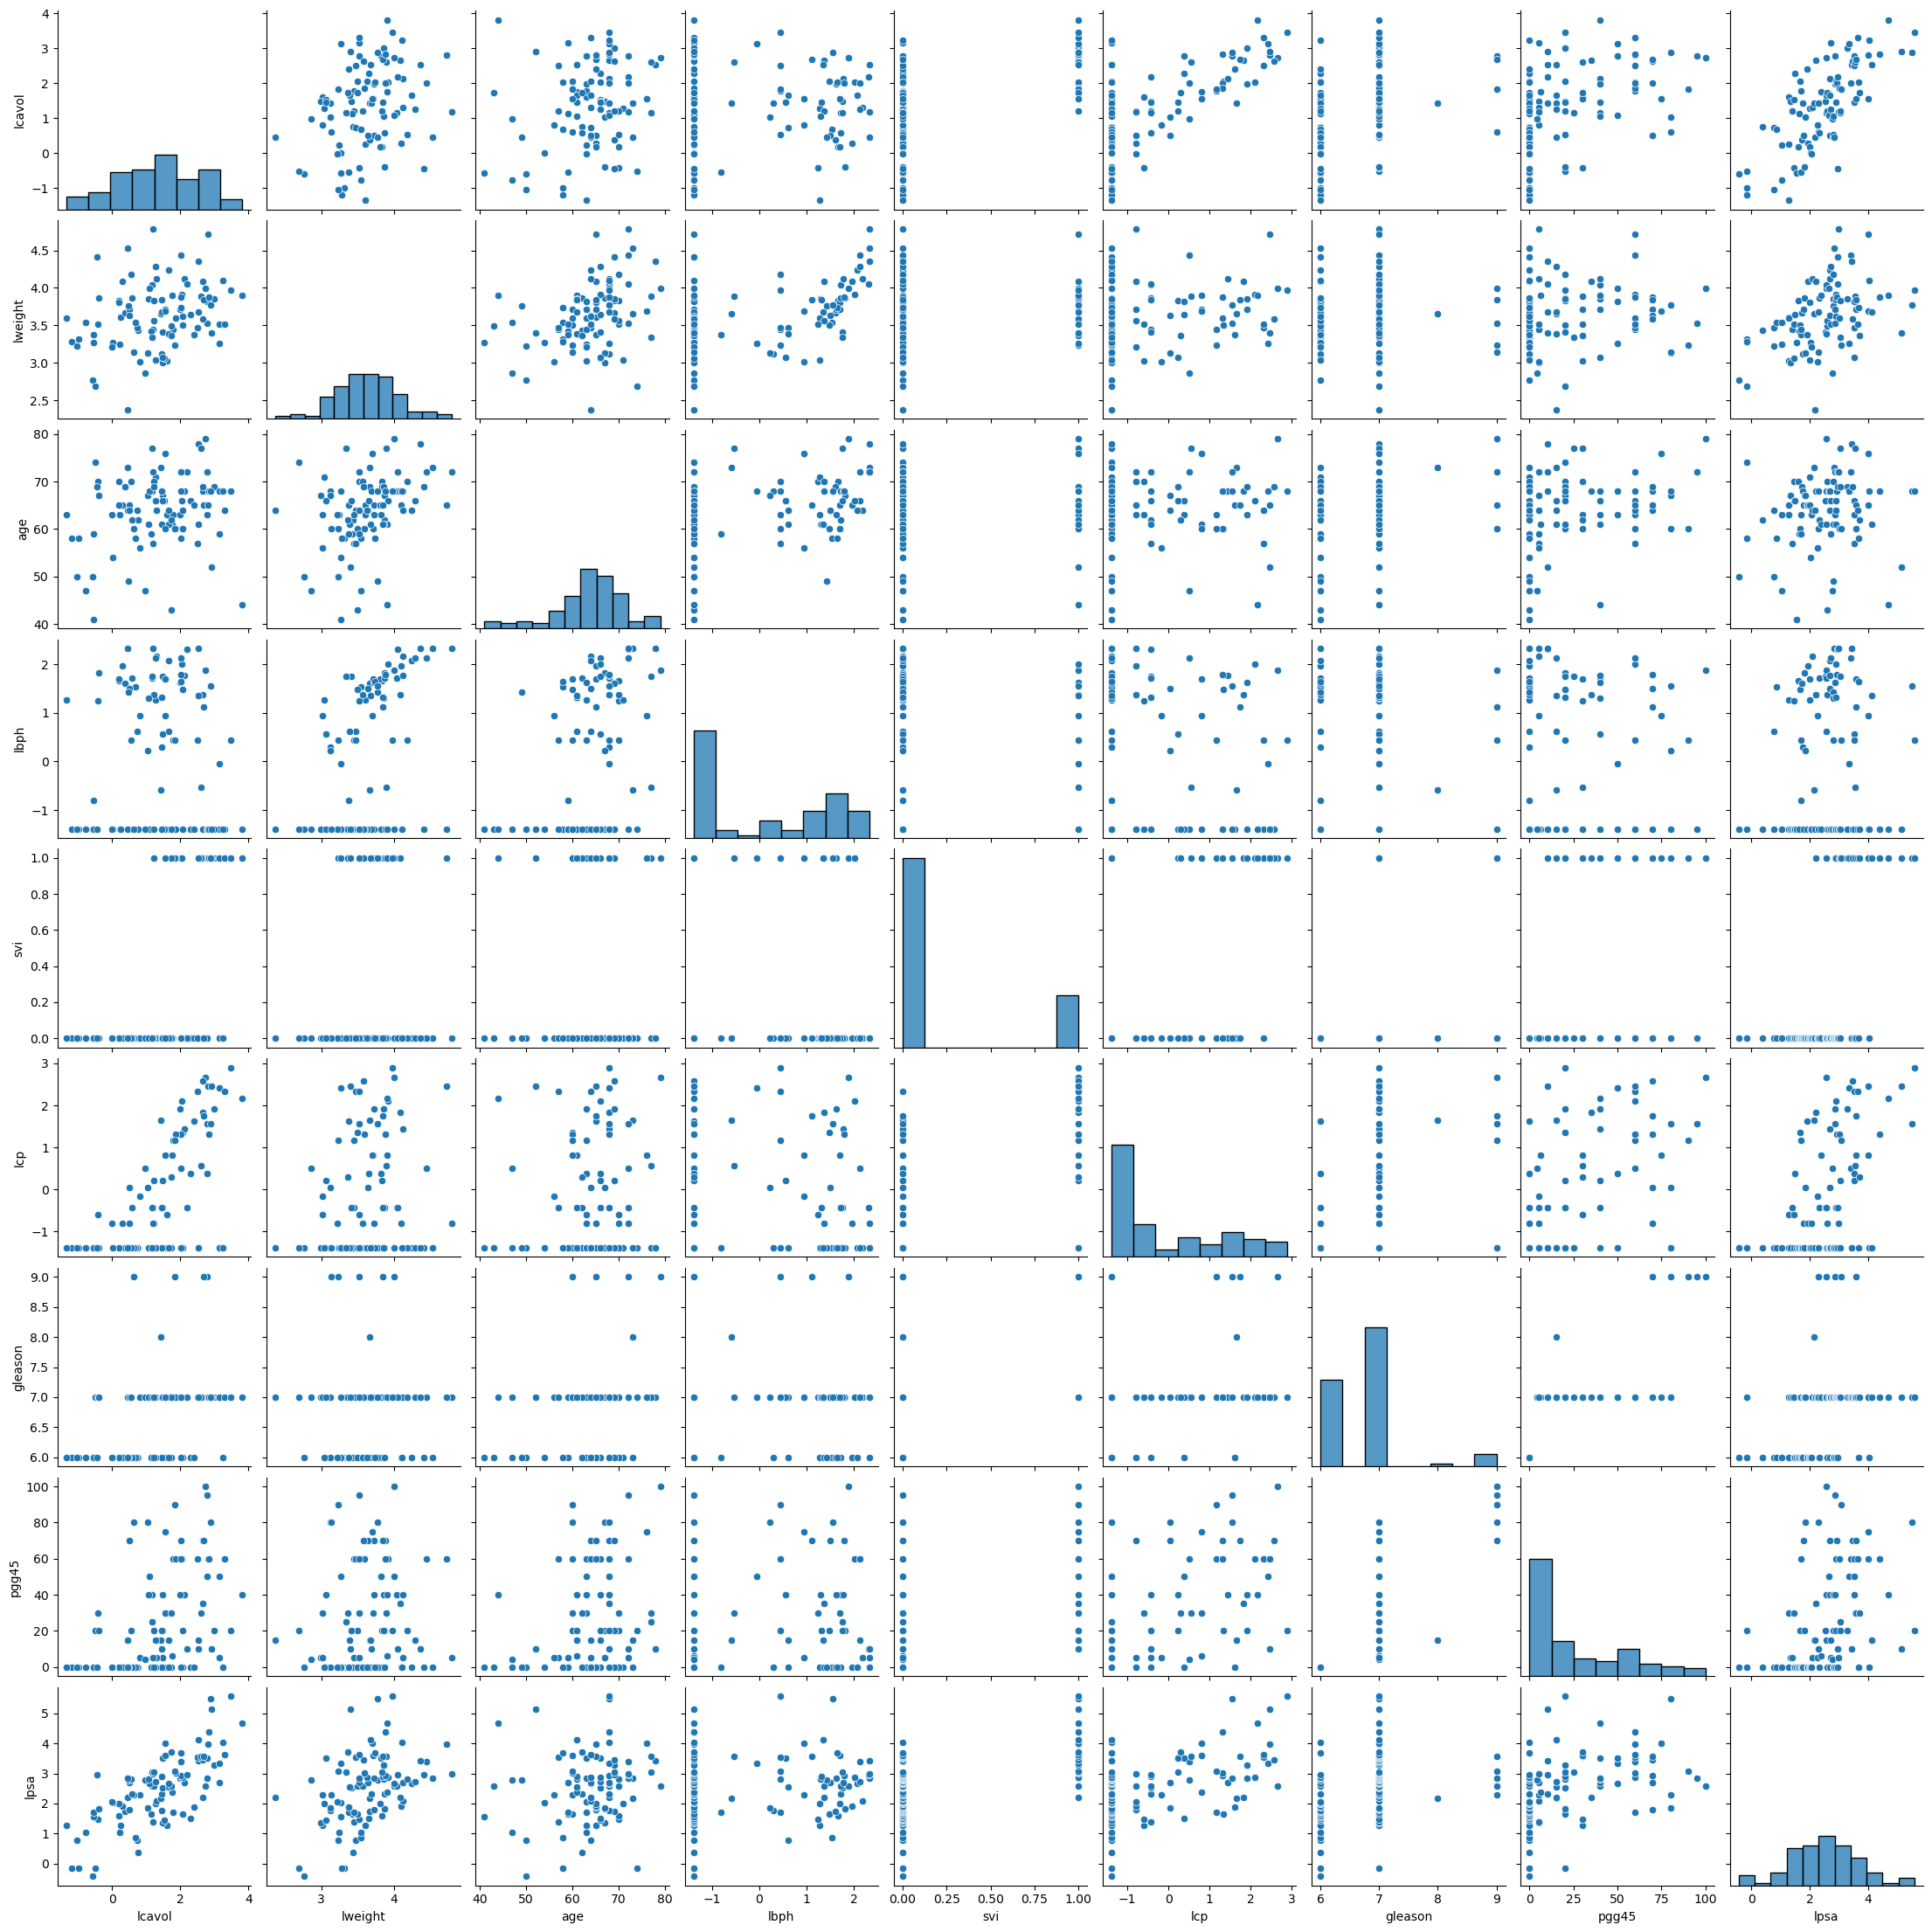

In [45]:
# Visualize the Distribution and Relationships:

plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

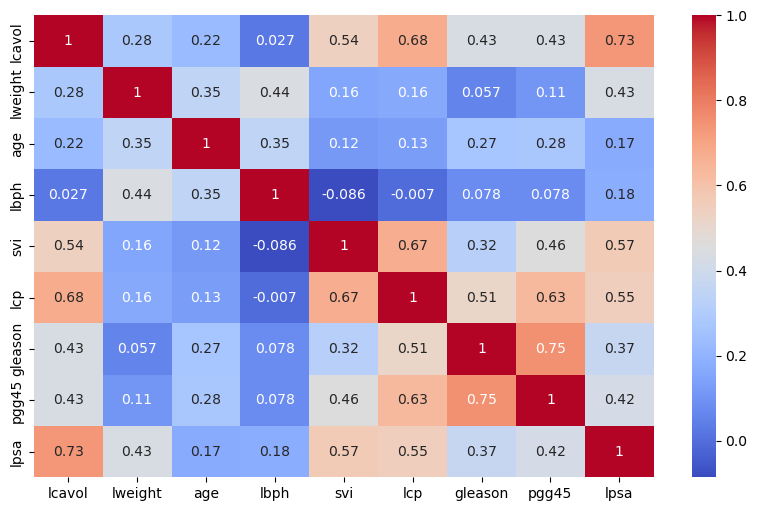

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [47]:
# Data Preprocessing:

X = df[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y = df['lpsa']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [48]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [49]:
# Evalution :

MSE = mean_squared_error(y_test,y_pred_rf)
R2 = r2_score(y_test,y_pred_rf)

print(f" Mean Square Error : {MSE}")
print(f" R2 Score : {R2}")

 Mean Square Error : 0.5605299494058401
 R2 Score : 0.5187134583775386


In [50]:
# Feature Importance :
importance = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature':X.columns,'Importance': importance})
importance_df = importance_df.sort_values(by = 'Importance', ascending=False)

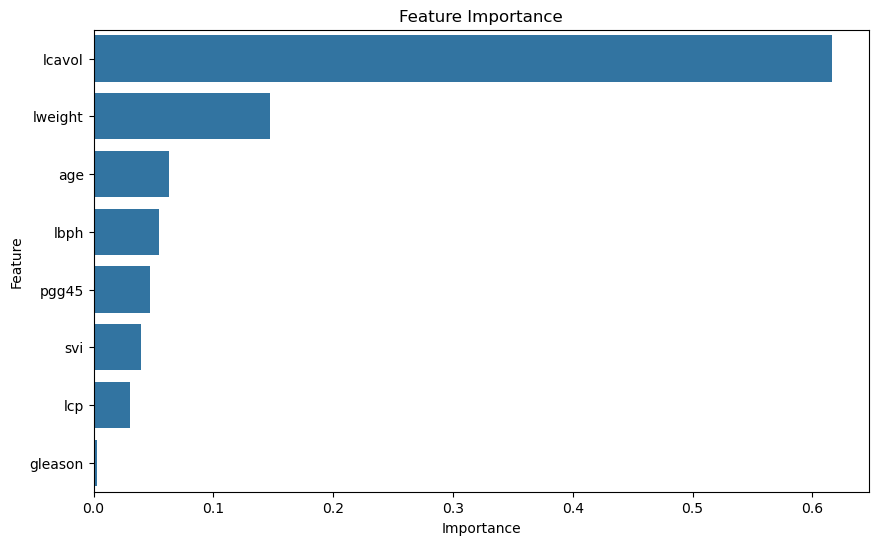

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Importance' , y = 'Feature', data = importance_df)
plt.title("Feature Importance")
plt.show()

In [55]:
# Hyperparameter Tuning with RandomizedSearchCV:

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [69]:
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best hyperparameters
best_params = rf_random.best_params_
print(f"Best Parameters from RandomizedSearchCV: {best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters from RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}


C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mohit\anaconda3\Lib\site-package

In [57]:
grid_param = {
    'n_estimators': [best_params['n_estimators']],
    'max_features': [best_params['max_features']],
    'max_depth': [best_params['max_depth']],
    'min_samples_split':[best_params['min_samples_split']],
    'min_samples_leaf':[best_params['min_samples_leaf']],
    'bootstrap':[best_params['bootstrap']]
}


In [60]:
rf_grid = GridSearchCV(estimator=rf_model, param_grid=grid_param,
                       cv=3, verbose=2, n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_grid_params = rf_grid.best_params_
print(f"Best Parameters from GridSearchCV: {best_grid_params}")

best_model = rf_grid.best_estimator_
y_pred_tuned = best_model.predict(X_test)


tuned_mse = mean_squared_error(y_test, y_pred_tuned)
tuned_r2 = r2_score(y_test, y_pred_tuned)

print(f"Tuned Mean Squared Error: {tuned_mse}")
print(f"Tuned R-squared: {tuned_r2}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters from GridSearchCV: {'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Mean Squared Error: 0.46192324011761593
Tuned R-squared: 0.6033799104456329


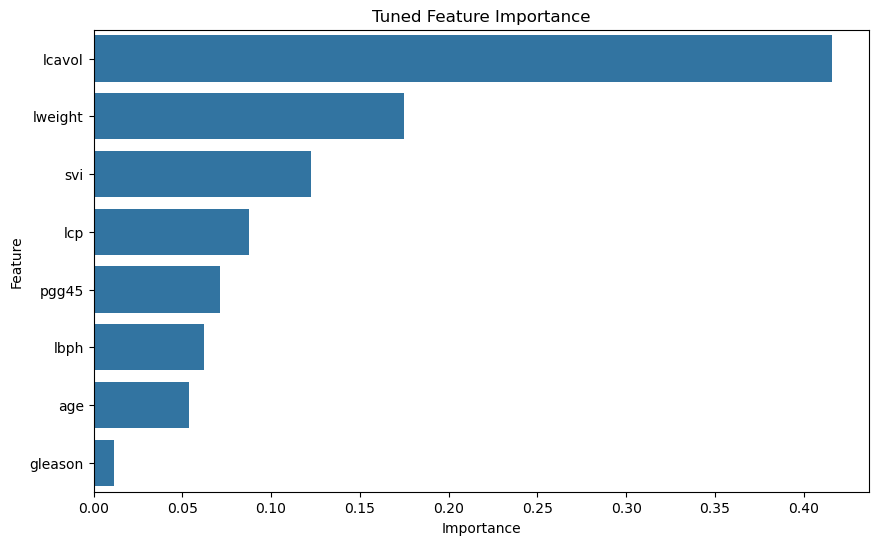

In [68]:
# Re-calculate feature importance

importances_tuned = best_model.feature_importances_
importance_df_tuned = pd.DataFrame({'Feature':X.columns,'Importance':importances_tuned})
importance_df_tuned = importance_df_tuned.sort_values(by='Importance', ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data= importance_df_tuned)
plt.title("Tuned Feature Importance")
plt.show()